In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv("/content/marketdata.csv")

In [3]:
data.head(20)

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Satisfaction  30 non-null     int64  
 1   Loyalty       30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


Text(0, 0.5, 'Loyalty')

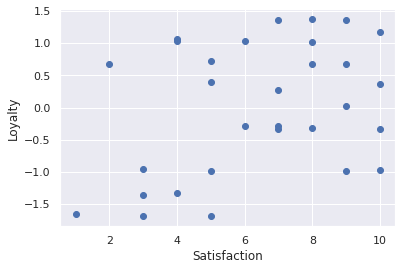

In [5]:
plt.scatter(data['Satisfaction'],data["Loyalty"])
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")

In [6]:
from sklearn import preprocessing
ds = data.copy()
ds=preprocessing.scale(data)
ds

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

In [7]:
from sklearn.cluster import KMeans

w=  []
for i in range(1,8 ):
    kmeans= KMeans(n_clusters=i,random_state=0)
    kmeans.fit(ds)
    w.append(kmeans.inertia_)

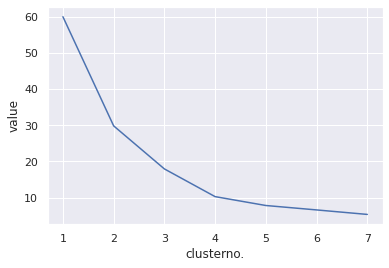

In [8]:


plt.plot(range(1,8),w)
plt.xlabel("clusterno.")
plt.ylabel("value")
plt.show()



In [9]:
k = KMeans(4)
k.fit(ds)

KMeans(n_clusters=4)

In [10]:
cs = data.copy()
cs['cp'] = k.fit_predict(ds)

In [11]:
cs


,Satisfaction,Loyalty,cp
0,4,-1.33,1
1,6,-0.28,2
2,5,-0.99,1
3,7,-0.29,2
4,4,1.06,3
5,1,-1.66,1
6,10,-0.97,2
7,8,-0.32,2
8,8,1.02,0
9,8,0.68,0


Text(0, 0.5, 'Loyalty')

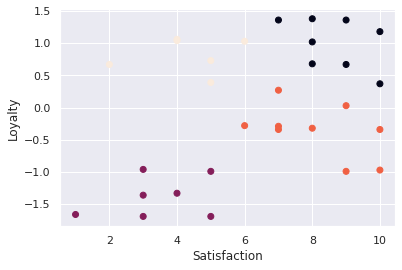

In [12]:
plt.scatter(data["Satisfaction"],data['Loyalty'],c= cs['cp'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')